In [73]:
## Dataset Pendigits
#Import all required libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import stochastic_gradient, SGDClassifier

In [108]:
#Preprocess Pendigits.csv.
df_trainP = pd.read_csv("pendigits.csv")

print(df_trainP.shape)
df_testP = df_trainP.sample(frac=0.2)
df_trainP = pd.concat([df_trainP, df_testP]).drop_duplicates(keep = False)
print(df_trainP.shape)
df_testP = np.array(df_testP)
df_test_dataP = df_testP[:,0:16]
df_test_targetP = df_testP[:,-1]
df_testP = pd.DataFrame(df_testP)


df_test_dataP = pd.DataFrame(df_test_dataP)
df_test_targetP = pd.DataFrame(df_test_targetP)

df_trainP = np.array(df_trainP)
dataP = df_trainP[:,0:16]
targetP = df_trainP[:,-1]


print(df_test_dataP.shape)

print(dataP.shape)
print(targetP)
all_pen_digits= np.unique(targetP)
print(all_pen_digits)

(10991, 17)
(8793, 17)
(2198, 16)
(8793, 16)
[2 4 1 ... 0 0 4]
[0 1 2 3 4 5 6 7 8 9]


   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.830933       0.843494      0.895336     0.966768   
1           0.884577       0.887625      0.932309     0.961336   
2           0.892788       0.893540      0.940842     0.962638   
3           0.911865       0.902639      0.951095     0.958870   
4           0.931772       0.925387      0.951774     0.956561   
5           0.927800       0.929026      0.957725     0.951109   
6           0.930250       0.922657      0.961170     0.942760   
7           0.940307       0.927662      0.965454     0.931779   
8           0.944318       0.938581      0.963731     0.914773   

   Training_Data_Size  Time_in_seconds  
0                10.0         0.005479  
1                20.0         0.009961  
2                30.0         0.012335  
3                40.0         0.016266  
4                50.0         0.021748  
5                60.0         0.027598  
6                70.0         0.029368  
7          

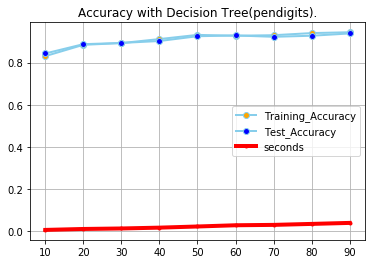

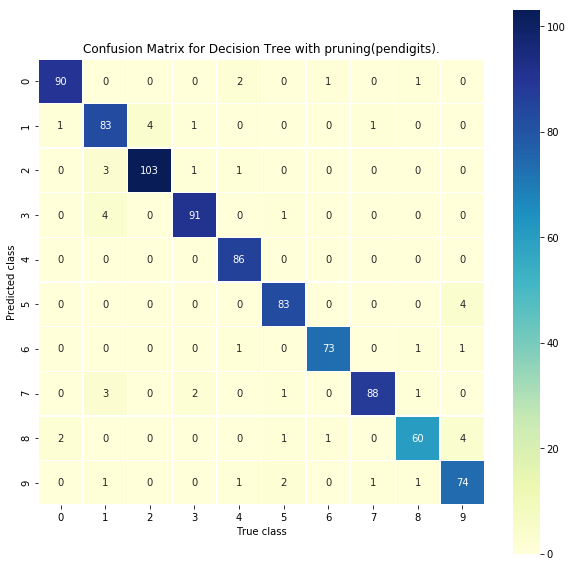

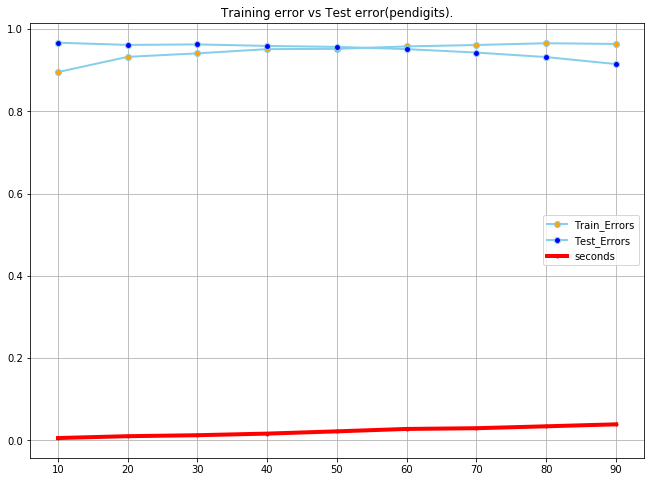

In [112]:
# Decision Tree and Pruning
index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy','Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds'])

# Applying Cross validations on training data
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(dataP, targetP,test_size=test_size)
    tree = DecisionTreeClassifier(criterion="gini",
                 splitter="best",
                 max_depth=20,
                 min_samples_split=4,
                 min_samples_leaf=8,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=5,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None,
                 presort=False)
    tree.fit(X_train_DT, y_train_DT)
    t_d = (datetime.now() - t).total_seconds() 
    y_test_pred_DT = tree.predict(X_test_DT)
    y_test_dataset_pred = tree.predict(df_test_dataP)

    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_targetP, y_test_dataset_pred)
    training_errors = tree.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = tree.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    
#     print('Train Accuracy = ', train_accuracy_DT, 'Test Accuracy = ', test_accuracy_DT, ' Train Size = ', 
#           100-(size * 10), 'Test Size = ', test_size * 100, 'Time required = ', t_d )
    df_result.loc[index] = [training_accuracy , test_accuracy, training_errors, test_errors,100-(size * 10),t_d]
    index = index + 1
writer = pd.ExcelWriter('dt_pen.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='dt_pen')
writer.save()
print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='.', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds', data=df_result, marker='.', color='red', linewidth=4, label="seconds")
plt.legend()
plt.title("Accuracy with Decision Tree(pendigits).")
plt.grid(True)

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(10,10))  
ax.set_title("Confusion Matrix for Decision Tree with pruning(pendigits).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=all_pen_digits,
            yticklabels=all_pen_digits,linewidths=.5, ax=ax)
plt.xlabel('True class')
plt.ylabel('Predicted class');


plt.figure(figsize=(11,8))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='.', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds', data=df_result, marker='.', color='red', linewidth=4, label="seconds")
plt.legend()
plt.title("Training error vs Test error(pendigits).")
plt.grid(True)

   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.403083       0.396269      0.410694     0.309578   
1           0.185217       0.188353      0.195108     0.188913   
2           0.343405       0.339399      0.368980     0.325861   
3           0.249431       0.222020      0.251351     0.102919   
4           0.324085       0.330300      0.324386     0.199227   
5           0.335418       0.327116      0.341422     0.231950   
6           0.361638       0.353048      0.367669     0.323730   
7           0.253553       0.298453      0.285613     0.342240   
8           0.276136       0.257507      0.254897     0.295455   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.039633  
1                20.0               0.045782  
2                30.0               0.081643  
3                40.0               0.080801  
4                50.0               0.109581  
5                60.0               0.144090  
6         

Text(0.5, 1.0, 'Training and test errors for Neural network(Pendigits).Layer Size = 50 Batch Size = 10000')

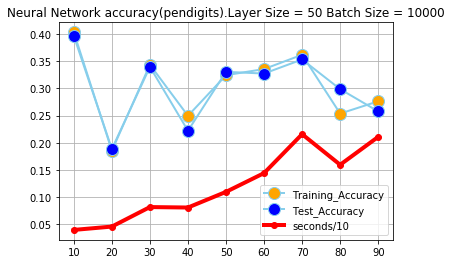

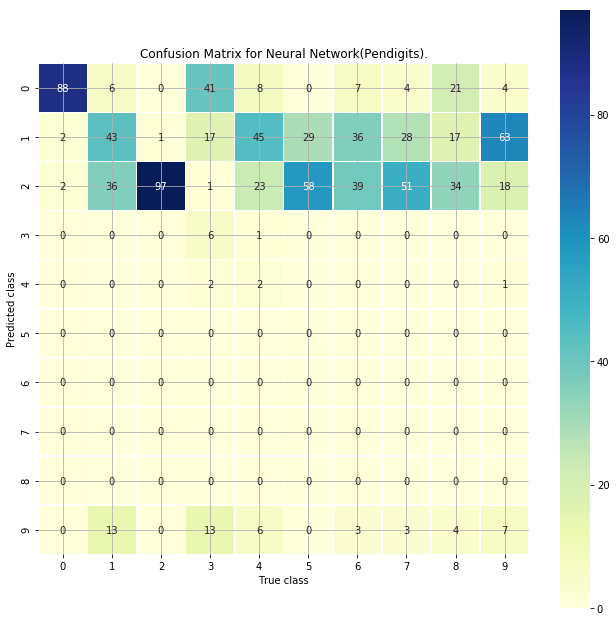

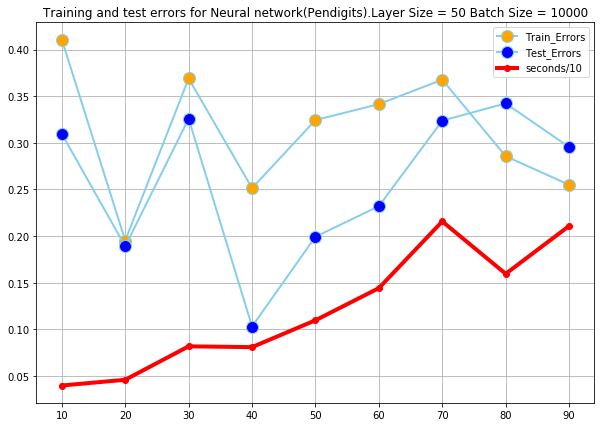

In [125]:
import warnings
warnings.filterwarnings('ignore')
#### Neural networks
from sklearn import neural_network

# Cross validations on training set
index = 0
layer_size = 50
batch_size1 = 10000
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(dataP, targetP,test_size=test_size)
    nn = neural_network.MLPClassifier( hidden_layer_sizes=layer_size, activation='identity', solver='sgd',alpha=0.1, batch_size=batch_size1,
            learning_rate='adaptive',learning_rate_init=0.2,max_iter=10000,random_state=42, tol=0.001, momentum=0.5,early_stopping=True, 
            validation_fraction=0.01, beta_1=0.850, beta_2=0.2)
    
    nn.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = nn.predict(X_test_DT)
    y_test_dataset_pred = nn.predict(df_test_dataP)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_targetP, y_test_dataset_pred)   
    train_errors = nn.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = nn.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1
writer = pd.ExcelWriter('neural_pen.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='neural_pen')
writer.save()
print(df_result)
     
# print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Neural Network accuracy(pendigits)."+"Layer Size = "+str(layer_size)+" Batch Size = "+str(batch_size1))

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Neural Network(Pendigits).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=all_pen_digits,
            yticklabels=all_pen_digits,linewidths=.5, ax=ax)
plt.xlabel('True class')
plt.ylabel('Predicted class');
plt.grid(True)

plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Training and test errors for Neural network(Pendigits)."+"Layer Size = "+str(layer_size)+" Batch Size = "+str(batch_size1))


   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.682588       0.677434      0.726962     0.679682   
1           0.670078       0.656506      0.688851     0.620185   
2           0.739116       0.722475      0.743269     0.634990   
3           0.706217       0.696542      0.710264     0.706027   
4           0.658631       0.639672      0.668335     0.683421   
5           0.640989       0.651956      0.645687     0.697271   
6           0.733510       0.726115      0.726401     0.604625   
7           0.667425       0.675614      0.686523     0.700966   
8           0.632955       0.626934      0.635536     0.751136   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.017400  
1                20.0               0.019929  
2                30.0               0.022293  
3                40.0               0.025244  
4                50.0               0.027050  
5                60.0               0.029835  
6         

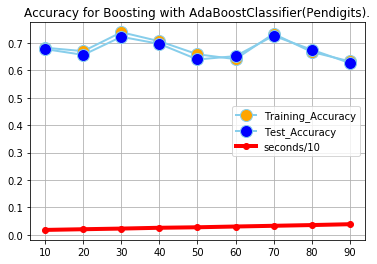

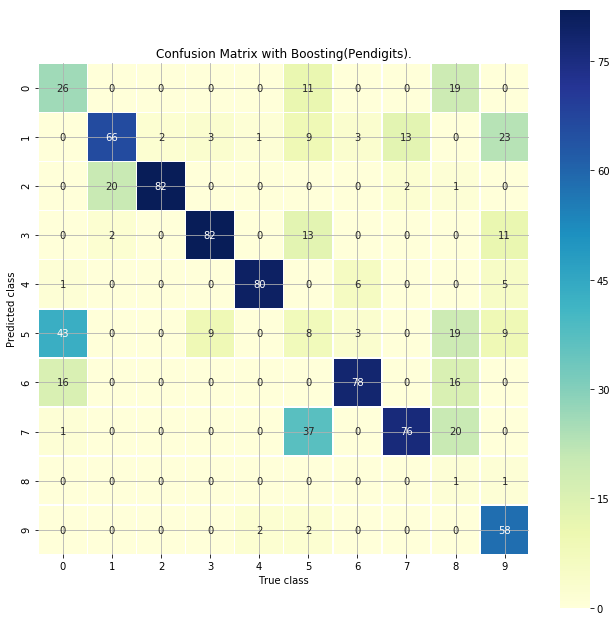

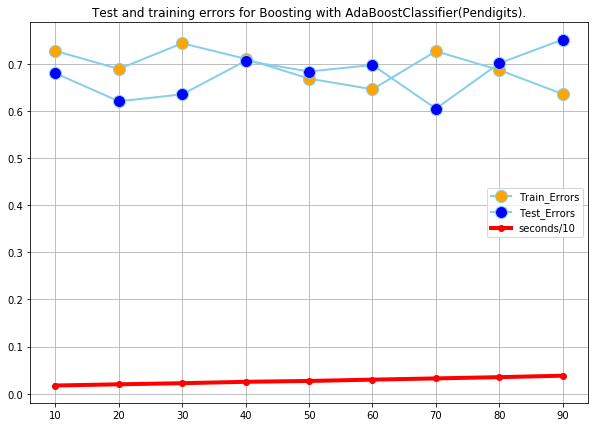

In [133]:
# Boosting with AdaBoostClassifier
from sklearn import ensemble
# Cross validations on training set
index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(dataP, targetP,test_size=test_size)
    boosting = ensemble.AdaBoostClassifier( base_estimator=None, n_estimators=50, learning_rate=0.4, algorithm='SAMME.R',
                 random_state=50)
    
    boosting.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = boosting.predict(X_test_DT)
    y_test_dataset_pred = boosting.predict(df_test_dataP)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_targetP, y_test_dataset_pred)    
    train_errors = boosting.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = boosting.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1

writer = pd.ExcelWriter('bossing_pen.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='boosting_pen')
writer.save()
print(df_result)

    
# print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Accuracy for Boosting with AdaBoostClassifier(Pendigits).")
# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix with Boosting(Pendigits).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=all_pen_digits,
            yticklabels=all_pen_digits,linewidths=.5, ax=ax)
plt.xlabel('True class')
plt.ylabel('Predicted class');
plt.grid(True)



plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Test and training errors for Boosting with AdaBoostClassifier(Pendigits).")
plt.grid(True)

   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.853424       0.853503      0.882821     0.868840   
1           0.839375       0.839399      0.853811     0.891116   
2           0.866797       0.872157      0.883201     0.857050   
3           0.887604       0.891720      0.896218     0.879644   
4           0.891290       0.889900      0.895814     0.895156   
5           0.903638       0.902184      0.904265     0.881467   
6           0.890447       0.884895      0.891795     0.835481   
7           0.877203       0.873976      0.883850     0.889710   
8           0.876136       0.901729      0.900417     0.881818   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.029817  
1                20.0               0.071176  
2                30.0               0.118644  
3                40.0               0.179950  
4                50.0               0.224948  
5                60.0               0.295082  
6         

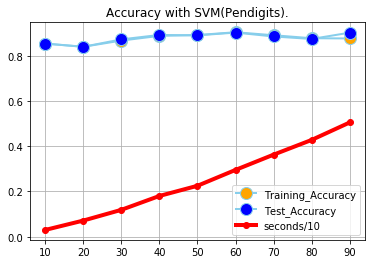

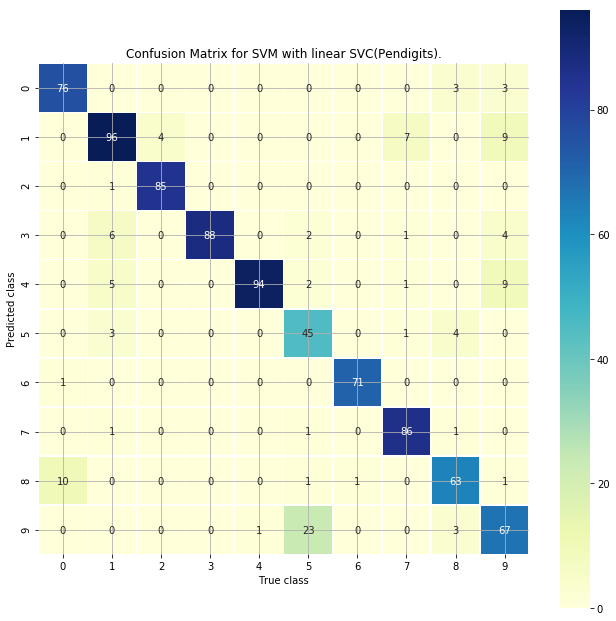

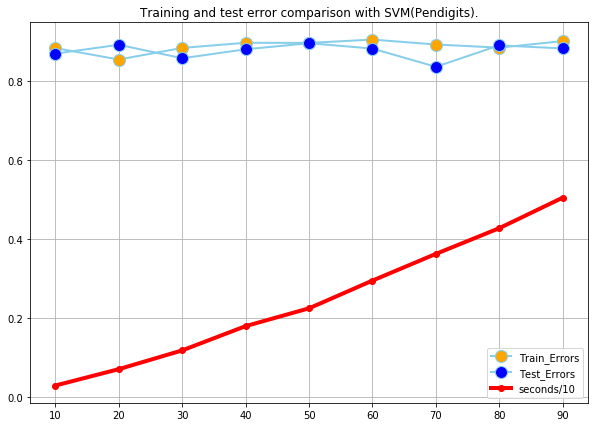

In [148]:
### Support Vector Machine.

index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
# Cross validations on training set
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    # Processing SVM with linear SVC
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(dataP, targetP,test_size=test_size)
    linear_svc = svm.LinearSVC(random_state=42,C=1.0, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='squared_hinge', max_iter=5000,
         multi_class='ovr', penalty='l2', tol=0.01, verbose=0)
    #linear_tree = svm.SVC(kernel="linear",random_state=42)
    
    linear_svc.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = linear_svc.predict(X_test_DT)
    y_test_dataset_pred = linear_svc.predict(df_test_dataP)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_targetP, y_test_dataset_pred)
    train_errors = linear_svc.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = linear_svc.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1
    
writer = pd.ExcelWriter('svm_pen.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='svm_pen')
writer.save()    

print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Accuracy with SVM(Pendigits).")
plt.grid(True)

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for SVM with linear SVC(Pendigits).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=all_pen_digits,
            yticklabels=all_pen_digits,linewidths=.5, ax=ax)
plt.xlabel('True class')
plt.ylabel('Predicted class');
plt.grid(True)

# Classification Report
#cls_report = classification_report(y_test_DT, y_test_pred_DT, target_names=[0,1])
#print(cls_report)

plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Training and test error comparison with SVM(Pendigits).")
plt.grid(True)

   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.815264       0.811192      0.912400     0.874400   
1           0.872353       0.873521      0.872014     0.893674   
2           0.876868       0.867152      0.876375     0.892463   
3           0.883813       0.884440      0.868638     0.904284   
4           0.896520       0.888535      0.900136     0.907209   
5           0.868960       0.871702      0.888720     0.889994   
6           0.855193       0.862602      0.893420     0.901440   
7           0.898238       0.896269      0.893233     0.841956   
8           0.861364       0.873521      0.895362     0.898864   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.010687  
1                20.0               0.010787  
2                30.0               0.010899  
3                40.0               0.010578  
4                50.0               0.010508  
5                60.0               0.010696  
6         

Text(0.5, 1.0, 'Training and test error comparison with SVM with RBF(Pendigits).')

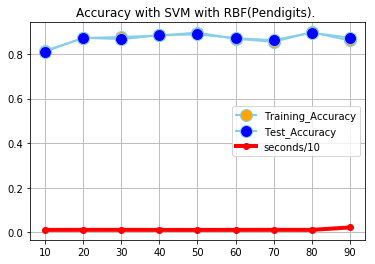

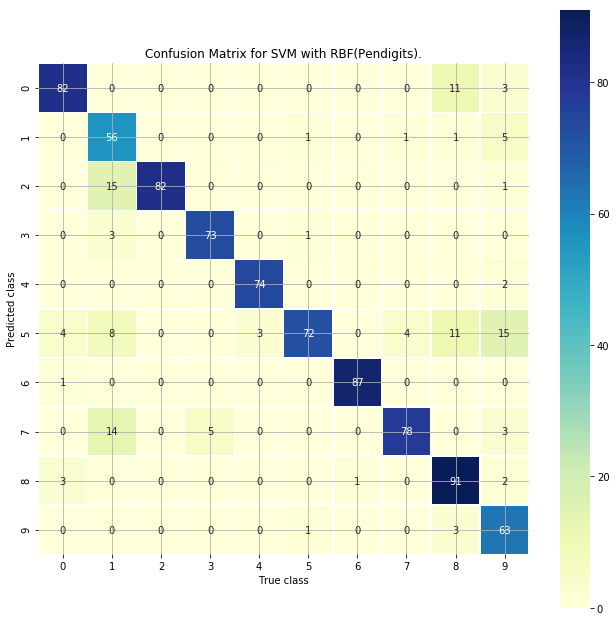

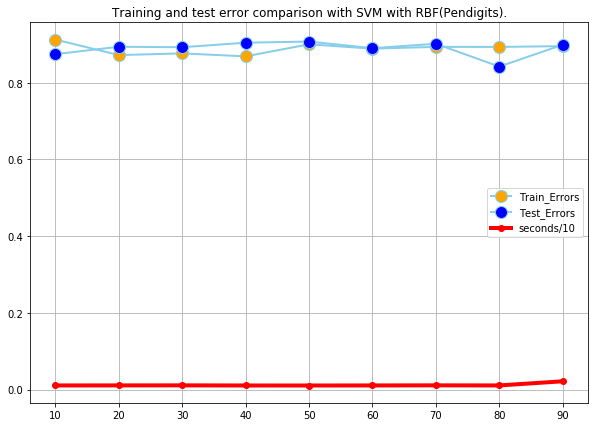

In [152]:
# Support Vector Machine with RBF 

index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
r = np.arange(0.1,1.1,0.1)
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    # Processing SVM with linear SVC
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(dataP, targetP,test_size=test_size)
    rbf = SGDClassifier(loss="hinge", penalty='l1', alpha=0.00000003, l1_ratio=0, fit_intercept=True, max_iter=50000, tol=0.0001, shuffle=True,
                 verbose=False, epsilon=stochastic_gradient.DEFAULT_EPSILON, n_jobs=3, random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5,
                 class_weight=None, warm_start=True, average=False)
    
    rbf.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = rbf.predict(X_test_DT)
    y_test_dataset_pred = rbf.predict(df_test_dataP)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_targetP, y_test_dataset_pred)    
    train_errors = rbf.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = rbf.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1

writer = pd.ExcelWriter('svm_rbf_pen.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='svm_rbf_pen')
writer.save()
print(df_result)
# Prediction on Test data set
rbf.predict(df_test_dataP)
    
# print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Accuracy with SVM with RBF(Pendigits). ")
plt.grid(True)

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for SVM with RBF(Pendigits).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=all_pen_digits,
            yticklabels=all_pen_digits,linewidths=.5, ax=ax)
plt.xlabel('True class')
plt.ylabel('Predicted class');
plt.grid(True)


plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Training and test error comparison with SVM with RBF(Pendigits).")

    K_Value  Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0       3.0           0.967779       0.966333      0.989761     0.996715   
3       3.0           0.989441       0.988171      0.992036     0.996426   
6       3.0           0.991358       0.990901      0.995678     0.996589   
9       3.0           0.993935       0.991811      0.996426     0.993556   
1       7.0           0.953247       0.953139      0.980660     0.993177   
4       7.0           0.984243       0.984076      0.984452     0.993015   
7       7.0           0.988174       0.988626      0.989536     0.989083   
10      7.0           0.991281       0.989536      0.992039     0.989765   
2      11.0           0.935305       0.932211      0.952218     0.990776   
5      11.0           0.980669       0.980892      0.977626     0.989929   
8      11.0           0.984307       0.984531      0.985214     0.985445   
11     11.0           0.989386       0.987261      0.988465     0.985974   

    Trainin

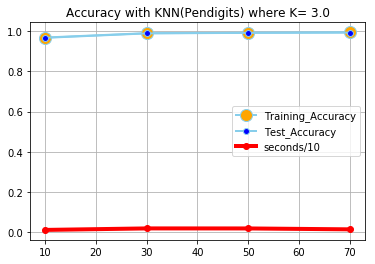

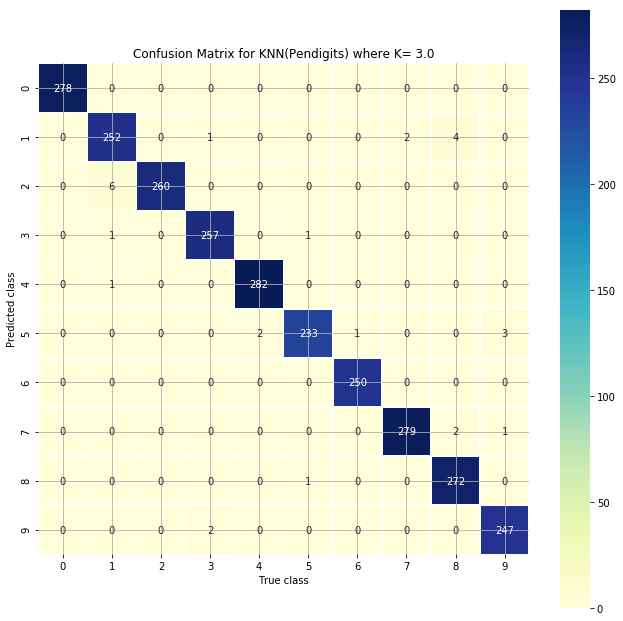

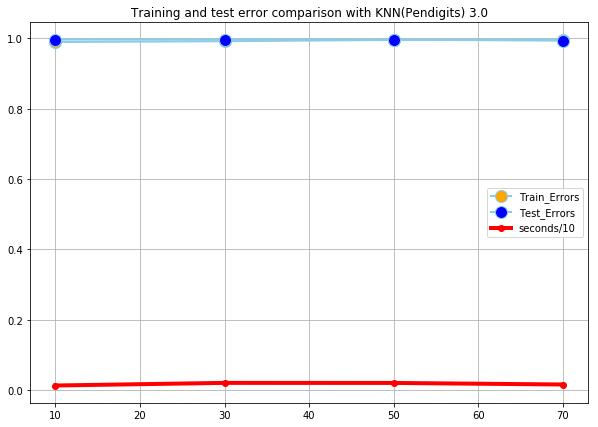

    Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
1            0.953247       0.953139      0.980660     0.993177   
4            0.984243       0.984076      0.984452     0.993015   
7            0.988174       0.988626      0.989536     0.989083   
10           0.991281       0.989536      0.992039     0.989765   

    Training_Data_Size  Time_in_seconds_by_10  
1                 10.0               0.057072  
4                 30.0               0.068544  
7                 50.0               0.068837  
10                70.0               0.057572  


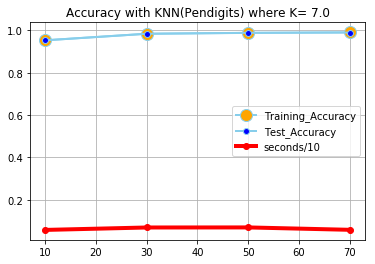

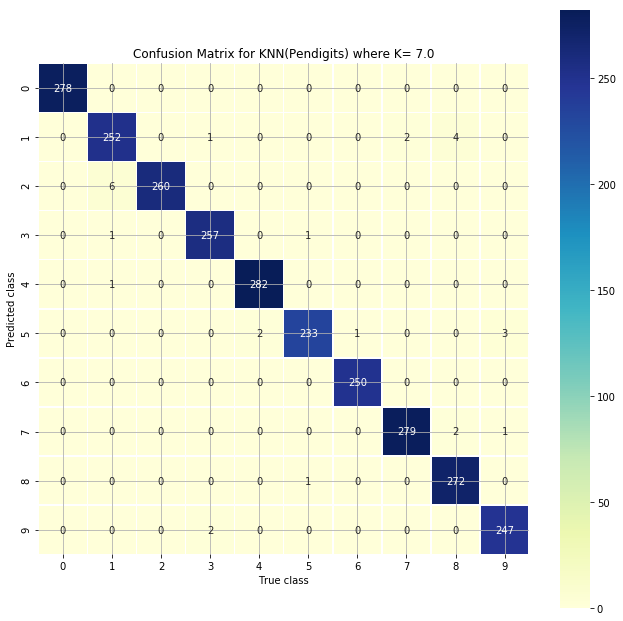

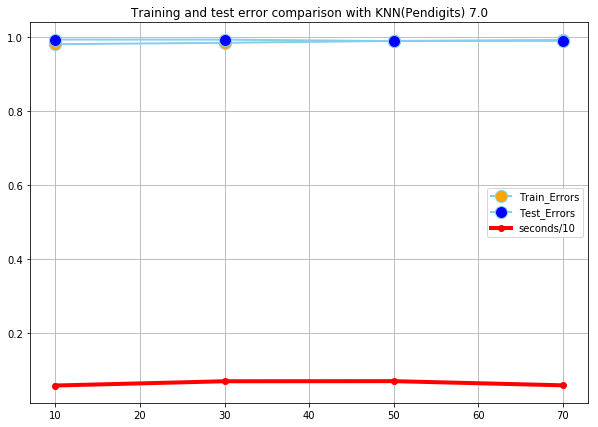

    Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
2            0.935305       0.932211      0.952218     0.990776   
5            0.980669       0.980892      0.977626     0.989929   
8            0.984307       0.984531      0.985214     0.985445   
11           0.989386       0.987261      0.988465     0.985974   

    Training_Data_Size  Time_in_seconds_by_10  
2                 10.0               0.115421  
5                 30.0               0.130709  
8                 50.0               0.130828  
11                70.0               0.111711  


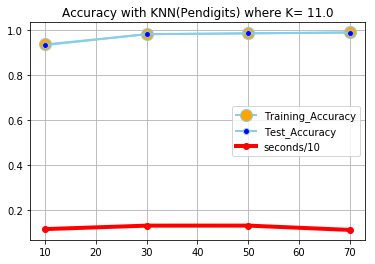

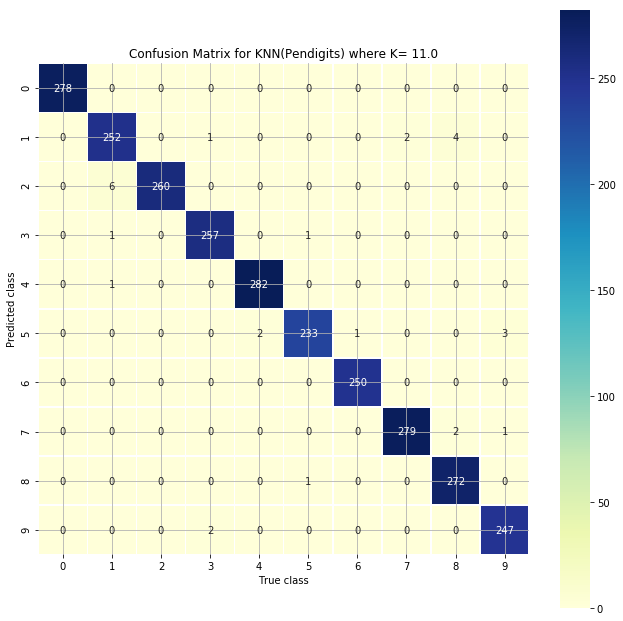

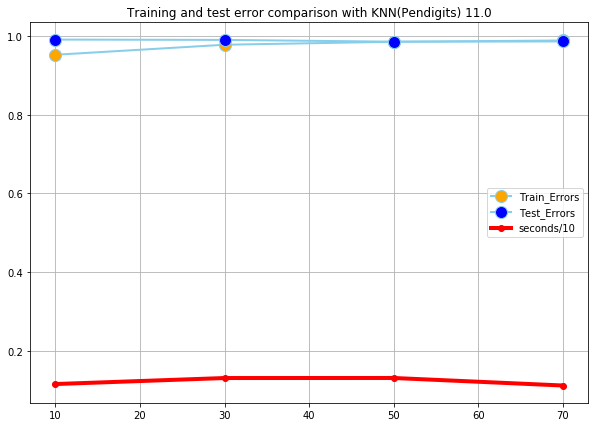

In [144]:
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

index=0
df_result = pd.DataFrame(columns=['K_Value','Training_Accuracy','Test_Accuracy','Train_Errors','Test_Errors','Training_Data_Size','Time_in_seconds_by_10'])
# Cross validations on training set
for size in range (9,2,-2):
    t = datetime.now()
    test_size = size/10

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(dataP, targetP,test_size=test_size)
   
    for k in range (3,12,4):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=15, p=2,
                 metric='minkowski', metric_params=None, n_jobs=1)
        knn_clf.fit(X_train_DT, y_train_DT)
        y_test_pred_DT = knn_clf.predict(X_test_DT)
        y_test_dataset_pred = knn_clf.predict(df_test_dataP)
        t_d = (datetime.now() - t).total_seconds() / 10
        training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
        test_accuracy = accuracy_score(df_test_targetP, y_test_dataset_pred)       
        train_errors = knn_clf.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
        test_errors = knn_clf.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
        df_result.loc[index] = [k, training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
        index = index + 1

df_result = df_result.sort_values(by=['K_Value'])

writer = pd.ExcelWriter('knn_pen.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='knn_pen')
writer.save()
print(df_result)

diff_k_values = pd.unique(df_result['K_Value'])
print(diff_k_values)

for k_v in diff_k_values:
    df1 = df_result["K_Value"]==k_v
    df2 = df_result[df1]
    df2 = df2.drop(['K_Value'],axis=1)
    print(df2)
    
    plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df2, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df2, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df2, marker='o', color='red', linewidth=4, label="seconds/10")
    plt.legend()
    title= "Accuracy with KNN(Pendigits) where K= "+str(k_v)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

    # Plot confusion matrix to understand prediction
    mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title("Confusion Matrix for KNN(Pendigits) where K= "+str(k_v))
    sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
                xticklabels=all_pen_digits,
                yticklabels=all_pen_digits,linewidths=.5, ax=ax)
    plt.xlabel('True class')
    plt.ylabel('Predicted class');
    plt.grid(True)
    plt.show()
    plt.close()


    plt.figure(figsize=(10,7))
    plt.plot( 'Training_Data_Size', 'Train_Errors', data=df2, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Test_Errors', data=df2, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df2, marker='o', color='red', linewidth=4, label="seconds/10")
    plt.legend()
    plt.grid(True)
    title2= "Training and test error comparison with KNN(Pendigits) "+str(k_v)
    plt.title(title2)
    plt.show()
    plt.close()
    
